In [57]:
from train import get_model, load_weights
import tifffile

from matplotlib import pyplot as plt
%matplotlib inline

import torch
import numpy as np

In [108]:
import yaml
from tqdm.auto import tqdm

In [12]:
with open('inference_configs/model/noise2noise_50.yaml') as f:
    mcc = yaml.safe_load(f)
with open('inference_configs/checkpoint/wasp_ssim.yaml') as f:
    ccc = yaml.safe_load(f)

In [20]:
img = tifffile.imread('/mnt/LSDF/projects/code-vita/BM_beamtimes/2022_02_P23/27-02/trichogramma/collect-all-27-02/001/ffcorr-dead-px/scan_0007.tif')

In [23]:
img_to = tifffile.imread('/mnt/LSDF/projects/code-vita/BM_beamtimes/2022_02_P23/27-02/trichogramma/collect-all-27-02/001/ffcorr-dead-px_denoised/scan_0007.tif')

In [17]:
md = get_model(**mcc)
load_weights(md, **ccc)

>>>>>>>>>>>>>>>> initializing model
trainable parameters in model: 32514833
<<<<<<<<<<<<<<<< done in 0.56 sec.
>>>>>>>>>>>>>>>> loading checkpoint
<<<<<<<<<<<<<<<< done in 0.16 sec.


In [249]:
import skimage

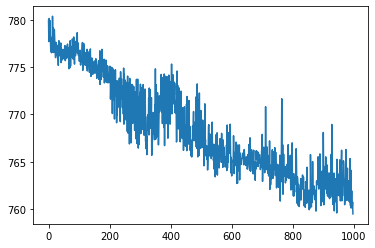

In [30]:
plt.plot(img_to[:, 500].sum(-1))

In [58]:
dim_1 = int(np.ceil(img.shape[-2]/32)*32)
dim_2 = int(np.ceil(img.shape[-1]/32)*32)

tmp_img = np.pad(img, ((0, 0), (0, dim_1-img.shape[-2]), (0, dim_2-img.shape[-1])), mode='reflect')

In [118]:
img_to_new_s = []
for i in tqdm(range(150)):
    img_to_new_s.append(md(torch.FloatTensor(tmp_img[680, None, None]
                                             +np.random.randn(*tmp_img[680].shape)*0.2)).detach().cpu().numpy()[0, 0])

  0%|          | 0/150 [00:00<?, ?it/s]

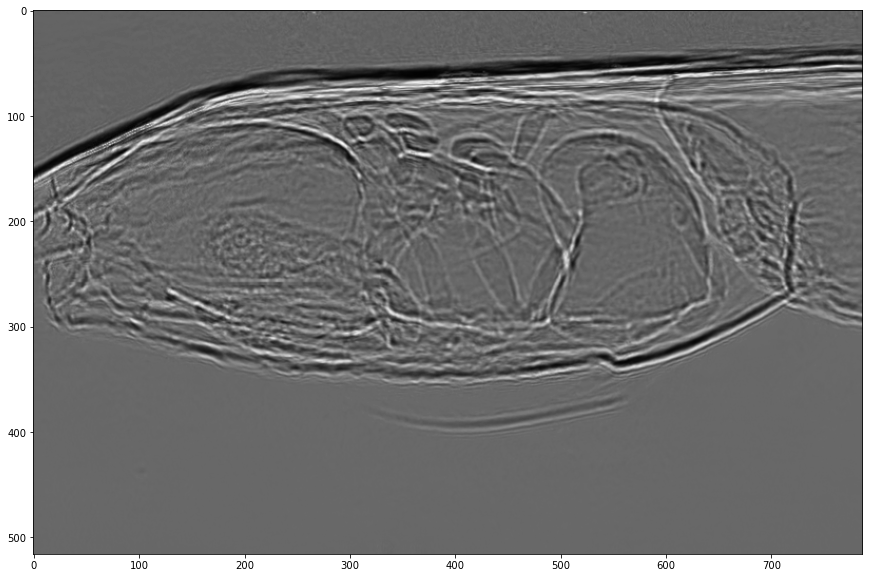

In [119]:
plt.figure(figsize=(16, 10))
plt.imshow(np.array(img_to_new_s).mean(0)[:516, :787], cmap='gray')

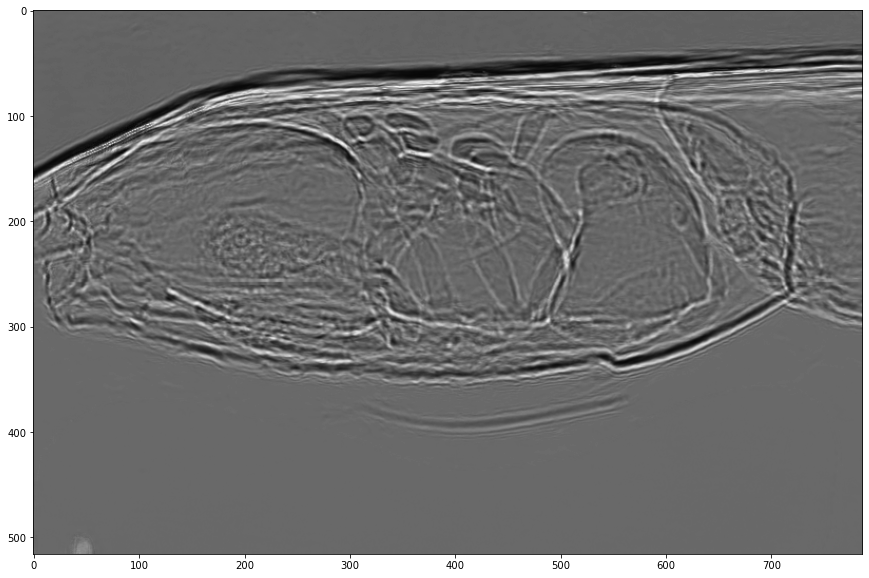

In [75]:
plt.figure(figsize=(16, 10))
plt.imshow(img_to[679], cmap='gray')